In [1]:
import glob
# import heartpy as hp
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
import scipy
import librosa

C:\Users\Raghunandan Gowda\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Raghunandan Gowda\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Raghunandan Gowda\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
# !pip install lazypredict

In [3]:
files=glob.glob(r"C:\Mini Project\PPGBPDatabase\Data File\0_subject\*")
files[0]

'C:\\Mini Project\\PPGBPDatabase\\Data File\\0_subject\\100_1.txt'

In [4]:
ppg_val=[]
for i in files:
    with open(i,'r') as val:
        ppg_val.append

In [5]:
id=[]
for i in range(0,len(files),3):
    id.append(files[i].split("\\")[5].split("_")[0])
id=list(map(int,id))

In [6]:
bp=pd.read_excel(r"C:\Mini Project\PPGBPDatabase\Data File\PPG-BP dataset.xlsx")
bp

# import sys, csv

# with open('C:\Mini Project\PPGBPDatabase\Data File\PPG-BP dataset.xlsx', "r+", encoding="Latin1")  as inputFile:
#     csvReader = csv.reader(inputFile, dialect='excel')
#     print(csv)
# bp=pd.read_csv(csvReader.)

,Cardiovascular Dataset Information File,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Hospital Electronic Medical Record,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Num.,subject_ID,Sex(M/F),Age(year),Height(cm),Weight(kg),Systolic Blood Pressure(mmHg),Diastolic Blood Pressure(mmHg),Heart Rate(b/m),BMI(kg/m^2),Hypertension,Diabetes,cerebral infarction,cerebrovascular disease
1,1,2,Female,45,152,63,161,89,97,27.268006,Stage 2 hypertension,NaN,NaN,NaN
2,2,3,Female,50,157,50,160,93,76,20.284799,Stage 2 hypertension,NaN,NaN,NaN
3,3,6,Female,47,150,47,101,71,79,20.888889,Normal,NaN,NaN,NaN
4,4,8,Male,45,172,65,136,93,87,21.971336,Prehypertension,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,215,415,Male,24,180,70,111,70,77,21.604938,Normal,NaN,NaN,NaN
216,216,416,Female,25,156,47,93,57,79,19.312952,Normal,NaN,NaN,NaN
217,217,417,Male,25,176,55,120,69,72,17.755682,Prehypertension,NaN,NaN,NaN
218,218,418,Male,25,173,63,106,69,67,21.049818,Normal,NaN,NaN,NaN


In [9]:
id1=list(bp["Unnamed: 1"])
sbp=list(bp["Unnamed: 6"])
dbp=list(bp["Unnamed: 7"])
sbp1=[]
dbp1=[]
bp1=[]
for i in id:
    if i in id1:
        sbp1.append(sbp[id1.index(i)])
        dbp1.append(dbp[id1.index(i)])
        bp1.append((sbp[id1.index(i)],dbp[id1.index(i)]))
                   
# print(id[1],sbp1[1],dbp1[1])
# print(bp1)

In [10]:
# svr_reg = MultiOutputRegressor(SVR(kernel=_kernel, C=_C, gamma=_gamma, degree=_degree, coef0=_coef0))
# svr_reg.fit(X_train_data, Y_train_data)

In [ ]:
# plt.plot(k)

In [ ]:
# b=ppg_clean(k)


In [61]:
#  -*- coding: utf-8 -*-
from warnings import warn

import numpy as np
import pandas as pd

from neurokit2.misc import as_vector, NeuroKitWarning
from neurokit2.signal import signal_filter


def ppg_clean(ppg_signal, sampling_rate=10, heart_rate=None, method="elgendi"):
    """Clean a photoplethysmogram (PPG) signal.

    Prepare a raw PPG signal for systolic peak detection.

    Parameters
    ----------
    ppg_signal : Union[list, np.array, pd.Series]
        The raw PPG channel.
    heart_rate : Union[int, float]
        The heart rate of the PPG signal. Applicable only if method is "nabian2018" to check that
        filter frequency is appropriate.
    sampling_rate : int
        The sampling frequency of the PPG (in Hz, i.e., samples/second). The default is 1000.
    method : str
        The processing pipeline to apply. Can be one of "elgendi" or "nabian2018". The default is "elgendi".

    Returns
    -------
    clean : array
        A vector containing the cleaned PPG.

    See Also
    --------
    ppg_simulate, ppg_findpeaks

    Examples
    --------
    >>> import neurokit2 as nk
    >>> import pandas as pd
    >>> import matplotlib.pyplot as plt
    >>>
    >>> # Simulate and clean signal
    >>> ppg = nk.ppg_simulate(heart_rate=75, duration=30)
    >>> ppg_elgendi = nk.ppg_clean(ppg, method='elgendi')
    >>> ppg_nabian = nk.ppg_clean(ppg, method='nabian2018', heart_rate=75)
    >>>
    >>> # Plot and compare methods
    >>> signals = pd.DataFrame({"PPG_Raw" : ppg,
    ...                         "PPG_Elgendi" : ppg_elgendi,
    ...                         "PPG_Nabian" : ppg_nabian})
    >>> signals.plot() #doctest: +ELLIPSIS
     <AxesSubplot:>

    References
    ----------
    - Nabian, M., Yin, Y., Wormwood, J., Quigley, K. S., Barrett, L. F., &amp; Ostadabbas, S. (2018).
    An Open-Source Feature Extraction Tool for the Analysis of Peripheral Physiological Data. IEEE Journal of
    Translational Engineering in Health and Medicine, 6, 1-11. doi:10.1109/jtehm.2018.2878000

    """
    ppg_signal = as_vector(ppg_signal)

    # Missing data
    n_missing = np.sum(np.isnan(ppg_signal))
    if n_missing > 0:
        warn(
            "There are " + str(n_missing) + " missing data points in your signal."
            " Filling missing values by using the forward filling method.",
            category=NeuroKitWarning
        )
        ppg_signal = _ppg_clean_missing(ppg_signal)

    method = method.lower()
    if method in ["elgendi"]:
        clean = _ppg_clean_elgendi(ppg_signal, sampling_rate)
    elif method in ["nabian2018"]:
        clean = _ppg_clean_nabian2018(ppg_signal, sampling_rate, heart_rate=heart_rate)
    else:
        raise ValueError("Neurokit error: Please use one of the following methods: 'elgendi' or 'nabian2018'.")

    return clean



# =============================================================================
# Handle missing data
# =============================================================================
def _ppg_clean_missing(ppg_signal):

    ppg_signal = pd.DataFrame.pad(pd.Series(ppg_signal))

    return ppg_signal

# =============================================================================
# Methods
# =============================================================================

def _ppg_clean_elgendi(ppg_signal, sampling_rate):

    filtered = signal_filter(
        ppg_signal, sampling_rate=sampling_rate, lowcut=0.5, highcut=8, order=3, method="butter_ba"
    )
    return filtered


def _ppg_clean_nabian2018(ppg_signal, sampling_rate, heart_rate=None):
    """Low-pass filter for continuous BP signal preprocessing, adaopted from Nabian et al. (2018).
    """

    # Determine low-pass filter value
    highcut = 40

    # Convert heart rate to seconds, check if low-pass filter within appropriate range
    if heart_rate is not None:
        heart_rate = heart_rate / 60

        if not highcut >= 10*heart_rate and not highcut < 0.5*sampling_rate:
            raise ValueError("Neurokit error: Highcut value should be at least 10 times heart rate and"
                             " less than 0.5 times sampling rate.")

    filtered = signal_filter(ppg_signal, sampling_rate=sampling_rate, lowcut=None, highcut=highcut, order=2, method="butterworth")

    return filtered

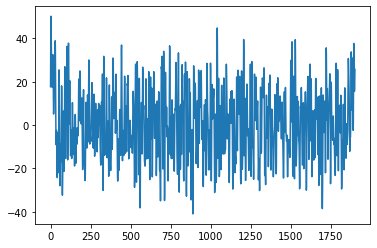

In [104]:
filtered_signal=[]
unfiltered_signal=[]
for i in range(0,len(files),3):
    dat1=files[i]
    with open(dat1,'r') as dat:
        m=(dat.read())
    n=m.split("\t")
    n.remove('')
    k=list(map(float,n))
    k=[int(i) for i in k]
    b=ppg_clean(k,50)
    unfiltered_signal.append(k)
    filtered_signal.append(b[50:2000])
plt.plot(filtered_signal[0][50:2000])

### 

In [105]:
mean=[]
median=[]
kurtosis=[]
skew=[]
std=[]
var=[]
percentile75=[]
percentile90=[]
bw0=[]
bw1=[]
bw2=[]
bw3=[]
fc0=[]
fc1=[]
fc2=[]
fc3=[]
zr0=[]
zr1=[]
zr2=[]
zr3=[]
srf0=[]
srf1=[]
srf2=[]
srf3=[]
ent=[]
for i in filtered_signal:
    median.append(np.median(i))
    mean.append(np.mean(i))
    std.append(np.std(i))
    var.append(np.var(i))
    percentile75.append(np.percentile(i,75))
    percentile90.append(np.percentile(i,90))
    skew.append(scipy.stats.skew(i))
    kurtosis.append(scipy.stats.kurtosis(i))
    bw0.append((librosa.feature.spectral_bandwidth(i).flatten()[0]))
    bw1.append((librosa.feature.spectral_bandwidth(i).flatten()[1]))
    bw2.append((librosa.feature.spectral_bandwidth(i).flatten()[2]))
    bw3.append((librosa.feature.spectral_bandwidth(i).flatten()[3]))
    fc0.append((librosa.feature.spectral_centroid(i).flatten()[0]))
    fc1.append((librosa.feature.spectral_centroid(i).flatten()[1]))
    fc2.append((librosa.feature.spectral_centroid(i).flatten()[2]))
    fc3.append((librosa.feature.spectral_centroid(i).flatten()[3]))
    zr0.append((librosa.feature.zero_crossing_rate(i).flatten()[0]))
    zr1.append((librosa.feature.zero_crossing_rate(i).flatten()[1]))
    zr2.append((librosa.feature.zero_crossing_rate(i).flatten()[2]))
    zr3.append((librosa.feature.zero_crossing_rate(i).flatten()[3]))
    srf0.append((librosa.feature.spectral_rolloff(i).flatten()[0]))
    srf1.append((librosa.feature.spectral_rolloff(i).flatten()[1]))
    srf2.append((librosa.feature.spectral_rolloff(i).flatten()[2]))
    srf3.append((librosa.feature.spectral_rolloff(i).flatten()[3]))
    ent.append(scipy.stats.entropy(i))



In [106]:
df=pd.DataFrame()
df["ppg"]=filtered_signal
df["mean"]=mean
df["median"]=median
df["kurtosis"]=kurtosis
df["skew"]=skew
df["std"]=std
df["var"]=var
df["ent"]=ent
df["bw0"]=bw0
df["bw1"]=bw1
df["bw2"]=bw2
df["bw3"]=bw3
df["fc0"]=fc0
df["fc1"]=fc1
df["fc2"]=fc2
df["fc3"]=fc3
df["zr0"]=zr0
df["zr1"]=zr1
df["zr2"]=zr2
df["zr3"]=zr3
df["srf0"]=srf0
df["srf1"]=srf1
df["srf2"]=srf2
df["srf3"]=srf3
df["sbp"]=sbp1
df["dbp"]=dbp1
df.tail()

,ppg,mean,median,kurtosis,skew,std,var,ent,bw0,bw1,...,zr0,zr1,zr2,zr3,srf0,srf1,srf2,srf3,sbp,dbp
214,"[-87.56659367080853, -83.92109649566595, -79.7...",-0.54,-0.84,4.99,-1.08,20.13,405.36,-inf,2289.57,1801.05,...,0.07,0.11,0.13,0.10,3563.75,3219.21,3057.71,3100.78,136,71
215,"[-67.95560462982583, -63.766432550513855, -62....",-0.39,-0.78,1.27,-0.35,23.86,569.13,-inf,2025.29,1566.56,...,0.08,0.11,0.14,0.11,3316.11,3100.78,3057.71,3046.95,143,65
216,"[-117.09806350113723, -106.66463764825886, -10...",-0.65,-0.24,9.71,-1.68,18.76,351.82,-inf,2542.12,2013.05,...,0.08,0.12,0.16,0.12,4414.31,3369.95,3111.55,3014.65,116,65
217,"[-67.59081274665104, -74.8645614731064, -92.94...",-0.44,-0.64,0.62,-0.27,24.40,595.19,-inf,1981.70,1553.91,...,0.08,0.12,0.15,0.12,3219.21,3111.55,3090.01,3046.95,133,71
218,"[-79.16164364872765, -86.96698662387092, -97.9...",-0.58,-0.21,10.32,-1.82,15.71,246.79,-inf,2352.95,1879.92,...,0.07,0.11,0.15,0.11,3520.68,3273.05,3100.78,3100.78,123,73


<AxesSubplot:>

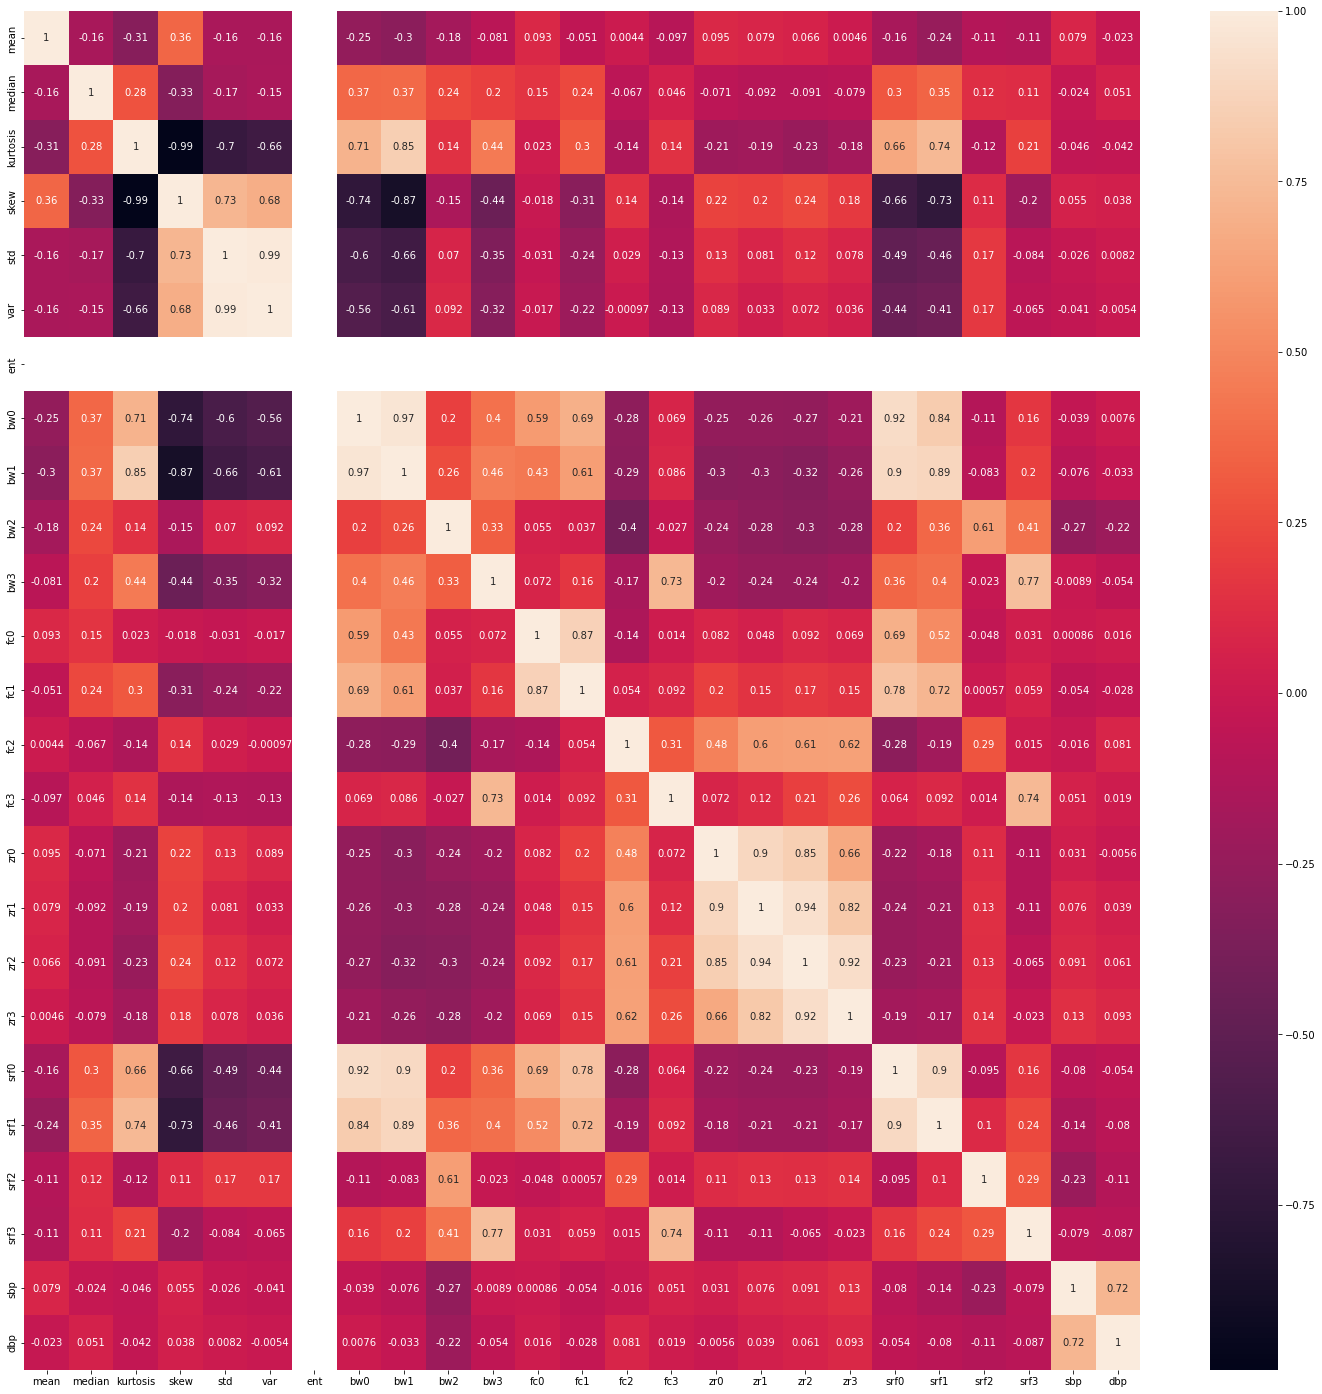

In [114]:
import seaborn as sb
corr=df.corr()
plt.figure(figsize=(25,25))
sb.heatmap(corr,annot=True)

In [94]:
df.fc0[0]

3688.98520802432

In [95]:
len(filtered_signal)

219

In [96]:
# from sklearn.svm import SVR
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# import numpy as np
# n_samples, n_features = 219, 8
# y = df.dbp
# X = df.drop(['sbp','dbp'],axis='columns')
# regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
# regr.fit(X, y)

In [97]:
y = df.dbp
X = df[['mean','median','std','var','bw0','fc1','zr2','srf3']]
# X = df[["bw0","bw1","bw2","bw3","fc0","fc1","fc2","fc3","zr0","zr1","zr2","zr3","srf0","zr1","zr2","zr3"]]
# X = df[["bw0","srf1"]]
# X = df[["zr0","srf0"]]

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)
np.shape(filtered_signal[0])

(1950,)

In [91]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
### lets check which model did better on Breast Cancer Dataset
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:01<00:00, 25.59it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
GeneralizedLinearRegressor                  -0.53       0.05 10.64        0.02
TweedieRegressor                            -0.53       0.05 10.64        0.01
BayesianRidge                               -0.53       0.05 10.64        0.01
BaggingRegressor                            -0.53       0.05 10.64        0.03
GammaRegressor                              -0.53       0.05 10.64        0.00
SGDRegressor                                -0.53       0.05 10.65        0.00
ElasticNet                                  -0.54       0.05 10.65        0.01
ElasticNetCV                                -0.54       0.05 10.68        0.09
RidgeCV                                     -0.55       0.04 10.70        0.02
LassoCV                                     -0.58       0.02 10.80        0.08
LassoLarsIC                                 -0.58   

In [38]:
# from sklearn.feature_selection import SelectPercentile as SP
# selector = SP(percentile=50) # select features with top 50% MI scores
# selector.fit(X,y)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 2)
rfe = rfe.fit(X_train,y_train)
print(rfe.score(X_train,y_train))
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

0.09137055837563451
[ True  True]
[1 1]


In [46]:
from sklearn.feature_selection import SelectKBest, chi2
X_5_best= SelectKBest(chi2, k=5).fit(X_train, y_train)
mask = X_5_best.get_support() #list of booleans for selected features
new_feat = [] 
for bool, feature in zip(mask, X_train.columns):
    if bool:
        new_feat.append(feature)
print('The best features are:{}'.format(new_feat))

ValueError: k should be >=0, <= n_features = 2; got 5. Use k='all' to return all features.

In [ ]:
from sklearn.svm import SVR
svr_linear = SVR(kernel='linear',gamma='scale', C=0.1, epsilon=1)
svr_linear.fit(X_train, y_train) 

In [ ]:
SVR(C=1.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svr_linear.score(X_test,y_test)
svr_linear.predict(X_test)

In [ ]:
svr_rbf = SVR(kernel='rbf',gamma='scale', C=11150, epsilon=11)
svr_rbf.fit(X_train, y_train) 

In [ ]:
svr_rbf.score(X_test,y_test)

In [ ]:
svr_rbf.predict(X_test)

In [ ]:
y_test

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    random_state=200)
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

In [ ]:
print('Coefficients: ', reg.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
  

In [ ]:
reg.score(X_test,y_test)

In [ ]:
# print(X_test)

In [ ]:
reg.predict(X_test)

In [ ]:
print(y_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 100) 

# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

In [ ]:
regressor.predict(X_test)

In [ ]:
regressor.score(X_test,y_test)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = linear_model.LinearRegression()
pol_reg.fit(X_train, y_train)

In [ ]:
pol_reg.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor1 = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
regressor1.fit(X_train, y_train) 

In [ ]:
regressor1.score(X_test, y_test)

In [ ]:
regressor1.predict(X_test)

In [ ]:
from sklearn.svm import SVR
regressor2 = SVR(kernel='rbf')
regressor2.fit(X_train,y_train)

In [ ]:
regressor2.score(X_train,y_train)

In [ ]:
regressor2.predict(X_test)

In [ ]:
""" baysian regression """

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import BayesianRidge
   
   
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)
   
# Creating and training model
model = BayesianRidge()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
# Model making a prediction on test data
prediction = model.predict(X_test)
print(prediction)   
# Evaluation of r2 score of the model against the test set
print(f"r2 Score Of Test Set : {r2_score(y_test, prediction)}")

In [ ]:
""" PCA """

In [ ]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 1)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_
from sklearn.linear_model import LogisticRegression 
 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
print(classifier.predict(X_test))
classifier.score(X_train,y_train)
classifier.score(X_test,y_test)

In [ ]:
# !pip uninstall h5py
# !pip install h5py

In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout